# *This Notebook Covers LogisticRegression Classifier Used To Correctly Classify The Patients With Or Without Heart_Disease*

 **Task:**
> Given Information About various health test of patient, can we predict if someone has heart disease  ?


**Algorithm Used**
>
`logisticregression()`

## **Data Scouce**:

[Kaggle](http://https://www.kaggle.com/ronitf/heart-disease-uci)
[UCI Repo](http://https://archive.ics.uci.edu/ml/datasets/Heart+Disease)


## **Features/Attribute Information**::

>
**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through, * more blood movement- better  
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


<font color = "#111140"> 
    Note:Here Cp, Thal and Slope has more category associated with them. 


In [ ]:
# importing all the necessary library and tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression Classifier from sklearn
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import plot_roc_curve

# Model Evaluation
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Loading Data As Pandas DataFrame

In [ ]:
H_D = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

### Exploring Data

In [ ]:
H_D.head(4)

Insight
>
Since all data are numeric but...
as I've mentioned before 3 columns are categoric. I will do fearure encoding later..

In [ ]:
H_D.isna().sum()

<font color = "#000050">
No Missing Data.

In [ ]:
H_D.info()

In [ ]:
H_D.describe()

In [ ]:
H_D["target"].value_counts()

In [ ]:
CountNoDisease = len(H_D[H_D.target == 0])
CountHaveDisease = len(H_D[H_D.target == 1])
print("Percentage of Patient With H_D --> {:.2f}%".format((CountNoDisease / (len(H_D.target))*100)))
print("Percentage of Patients Without H_D --> {:.2f}%".format((CountHaveDisease / (len(H_D.target))*100)))

No. of postive(with) and negative(without) examples are balanced.

In [ ]:
# Visualizing
H_D['target'].value_counts().plot(kind = 'bar', color = ["#990000","lightblue"]);

In [ ]:
H_D.count()

Insight
>
 

### Heart_Disease Frequency according to Sex.

In [ ]:
H_D["sex"].value_counts()

Note
<font color ="red">
>
    Male is more 2x than Female.


### Sex and Heart Disease

In [ ]:
# Comparing sex with target
pd.crosstab(H_D.target, H_D.sex)

In [ ]:
# Visualizing above crosstab
pd.crosstab(H_D.target, H_D.sex).plot(kind = "bar", figsize = (10,6), 
                                     color = ["#900000", "#000070"])
plt.title("Heart_Disease according to Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Number")
plt.legend(["Female","Male"]);

Insight
>
1. (1 = Has Heart Disease), as we can see no. of heart disease in female is around 78 and in male is around 98.
2. Since data of male sample is more than2x than female so its not the perfectly balanced dataset
3. As we can see female are more likely to have heart disease than male.(Note: data is not equal)

### Age and heart disease

In [ ]:
pd.crosstab(H_D.target, H_D.age[H_D.target == 1]) # Age Vs Heart_D

In [ ]:
pd.crosstab(H_D.age,H_D.target).plot(kind="bar",figsize=(20,6))
plt.title('Age and No of Patient with heart disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Insight
>
looks like age group above 40 are more prone to have heart_disease ...

In [ ]:
pd.crosstab(H_D.target, H_D.thalach)  # Thalach = maximun heart rate

### Visualizing Age Vs. Thalach

In [ ]:
# Scatter plot
plt.scatter(H_D.age[H_D.target ==1], H_D.thalach[H_D.target == 1], c = 'black')
plt.xlabel("Age")
plt.ylabel("Max_Heart_Rate_Acheived");

Insight
>
Less age = High thalach


In [ ]:
# Checking Age Distribution with boxplot
plt.boxplot(H_D.age);

Insight
>
Median age is 55+ so it more aapropriate to test t
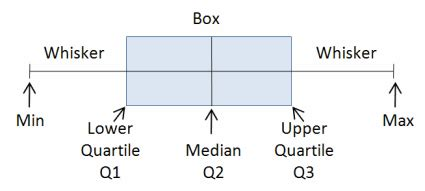

In [ ]:
H_D['sex'].value_counts().plot(kind = "bar", color = ["#000050", "#500000"])
plt.title("Heart Disease according to Sex")
plt.xlabel(" Male                            Female ") 
plt.legend();

Insight
>
 As we can see

### Correlation Matrix

In [ ]:
H_D.corr()

In [ ]:
# Visualizing Correlation in heatmap
cor_mat = H_D.corr()
fig, ax = plt.subplots(figsize = (16,10))
ax = sns.heatmap(cor_mat,
                annot = True,
                linewidth = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu")

# Modeling

### Defining a function to split data into Train_Test

We can use train_test_split from sklearn which is go to way But for the purpose of learning I am creating function to split data.

In [ ]:
def split_data(data, test_ratio):
    np.random.seed(42)
    shuffling_indices = np.random.permutation(len(data))
    test_size = int(len(data)*test_ratio)
    test_indices = shuffling_indices[:test_size] # Setting test index from start to upto test_size
    train_indices = shuffling_indices[test_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set,test_set = split_data(H_D, 0.2) # Passing 20% test data ratio to function

In [ ]:
train_set.shape, test_set.shape

In [ ]:
X_train = train_set.drop(["target"], axis = 1)
y_train = train_set["target"]
X_test = test_set.drop("target", axis = 1)
y_test = test_set["target"]

In [ ]:
# No of train and test sets 
len(X_train), len(y_train), len(X_test), len(y_test)

# Applying LogisticRegression Classifier

In [ ]:
# Instiantiate the model
logistic_model = LogisticRegression()

# Fitting the model
logistic_model.fit(X_train, y_train)

# Evaluating Model
logistic_model.score(X_test, y_test)

As we can see the accuracy.
To remove warning we can
1. Increase max iter to higher value like max_iter=1000
2. Import warning and ignore 

In [ ]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_test, y_test)

# Hyperparameter Tuning with RandomizedSearchCV

In [ ]:
LogisticRegression().get_params().keys()

These are the parameters that we can tune|

In [ ]:
# Creating a dictionary to pass some of the parameters that LogReg takes
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver" : ["liblinear"],} #The logspace() function return numbers spaced evenly on a log scale.

In [ ]:
# Setup random hyperparameter search for Logistic Regression
randomized_search_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                                              cv = 5,
                                              n_iter = 20,
                                              verbose = True)

In [ ]:
# Fitting the hyperparmaeter search model for LogisticRegression
randomized_search_log_reg.fit(X_train, y_train)

In [ ]:
# Checking the score
randomized_search_log_reg.score(X_test,y_test), randomized_search_log_reg.best_params_

<font color = "blue">
1. As we can see the performance has incresed from 0.866 to 0.883 . 
    
    
    2. And on using randomsearch for 20 iter best value for C is 0.23..., solver = 'liblinear'

# Hyperparameter tuning using GridSearchCV

In [ ]:
# Setup hyperparameter search 
#grid_search_logistic_regression(gs_lr)
# Setup logistic regression grid(lrg)
lrg = {"C": np.logspace(-4,4,30),
                "solver": ["liblinear"],
               }

gs_lr = GridSearchCV(LogisticRegression(),
                    param_grid = lrg,
                    cv =5,
                    verbose = True)
gs_lr.fit(X_train, y_train)

In [ ]:
gs_lr.score(X_test, y_test), gs_lr.best_params_

Accuracy is lower than the RandomizedSearchCV one way to improve is using stratifiedKfold or for larger dataset GridSearchCV 2.0 = `TuneGridSearchCV` can be used

In [ ]:
y_preds = gs_lr.predict(X_test)
y_preds

In [ ]:
# ROC curve
plot_roc_curve(gs_lr, X_test, y_test)

<font color = "Blue">
    If AUC = 1, it means there is perfect prediction by the model. If AUC = 0.5 it would mean the model is unable to discriminate between classes.

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

In [ ]:
# Visualizing confusion matrix

def plot_confusion_mat(y_test, y_preds):
    fig,ax = plt.subplots()
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("False Label")
plot_confusion_mat(y_test, y_preds)

# Using Logistic regression with 1 Hidden Layer NN

The steps are as follows:
1. Converting categorical to Numeric
2. Normalizing
3. Splitting data int train and test set
4. Transpose our data set in order to make ready for dimension match

**Since this is binary classification problem so we will use sigmoid activation function in output layer.**
4. Define sigmoid function
5. Initialize weight(random) and bias(0)
6. Define function to calculate forward( compute activation and cost) and backward propagation(compute gradients from cost)
7. Define function to update weight and bias and compute new activation function
8. Use that activation function to predict/classify

In [ ]:
H_D.tail(4) # Let's look our dataset before feature encoding

### Converting 3 categorical columns to numeric using pandas

In [ ]:
dummies = pd.get_dummies(H_D[["cp", "slope", "thal"]]) # Passing list of categories
print(dummies)

In [ ]:
H_D.tail(4) # This is after feature encoding

In [ ]:
X_orig = H_D.drop("target", axis = 1)
y = H_D.iloc[:, -1].values
X_orig, y

In [ ]:
# Normalizing data , hereX = x normalized
x = ( X_orig - np.min(X_orig) ) / ( np.max(X_orig) -  np.min(X_orig) ).values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# I have used iloc and pandas df method here
X_orig = H_D.drop("target", axis = 1)
y = H_D.iloc[:, -1].values
X_orig, y

In [ ]:
x = (X_orig - np.min(X_orig)) / (np.max(X_orig) - np.min(X_orig)).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
#Transposing 
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

In [ ]:
#initialize
def initialize(dimension):

    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

In [ ]:
def sigmoid(z):
    
    A = 1/(1+ np.exp(-z))
#     return (1/(1+ np.exp(-z)))
    return A



In [ ]:
import numpy as np
sigmoid(np.array([0,2]))

In [ ]:
m = X_train.shape[1]
m

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$

In [ ]:
def forwardBackward(w,b,X_train,y_train):
    # Forward
    
    Z = np.dot(w.T,X_train) + b
    A = sigmoid(Z)
    loss = -(y_train*np.log(A) + (1-y_train)*np.log(1- A))
    cost = np.sum(loss) / m
    
    # Backward
    dw =  np.dot(X_train,((A-y_train).T))/ m
    db =  np.sum(A - y_train)/ m
    gradients = {"dw" : dw, "db" : db}
    
    return cost,gradients


In [ ]:
def update(w,b,X_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(w,b, X_train,y_train)
        w = w - learningRate * gradients["dw"]
        b = b - learningRate * gradients["db"]
        
        costList.append(cost)
        index.append(i)
    
    parameters = {"weight": w,"bias": b}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [ ]:
def predict(w,b, X_test):
    # After update again calculating Z and A(with updated w & b)
    Z = np.dot(w.T,X_test) + b
    A = sigmoid(Z)

    y_prediction = np.zeros((1,X_test.shape[1]))
    
    for i in range(A.shape[1]):
        if A[0,i] >= 0.5:
            y_prediction[0,i] = 1
        else:
            y_prediction[0,i] = 0
    return y_prediction


In [ ]:
def logistic_regression(X_train,y_train,X_test,y_test,learningRate,iteration):
    
    dimension = X_train.shape[0]
    w,b = initialize(dimension)
    
    parameters, gradients = update(w,b,X_train,y_train,learningRate,iteration)

    y_prediction =  predict(parameters["weight"],parameters["bias"],X_test)
    
    print("Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

In [ ]:
logistic_regression(X_train,y_train,X_test,y_test,0.05,1000)